<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (5 Marks)

In [38]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing
import json
import tensorflow as tf
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D,Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from tensorflow.keras import Sequential,Model,Input
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, LSTM, Dropout, Activation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
project_path = '/content/drive/My Drive/Notebooks/Data/'

In [5]:
json_path = project_path + 'Sarcasm_Headlines_Dataset.json'

In [6]:
def parseJson (fname):
  for line in open(fname, 'r'):
    yield eval(line)

In [7]:
Data = list(parseJson(json_path))

### Drop `article_link` from dataset (5 Marks)

In [8]:
sens = []
labels = []
for line in open(json_path, 'r'):
    temp = []
    temp.append(json.loads(line))
    sens.append(temp[0]["headline"])
    labels.append(temp[0]["is_sarcastic"])

In [9]:
df = pd.DataFrame(columns = ["sens","labels"])
df["sens"] = np.array(sens)
df["labels"] = np.array(labels)

In [10]:
df.head()

,sens,labels
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


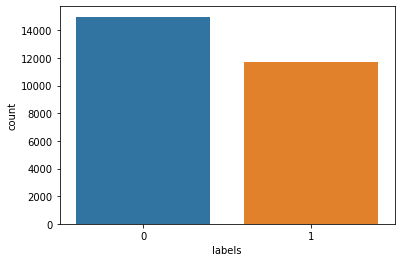

In [15]:
import seaborn as sns
sns.countplot(x = 'labels',data = df)

### Get length of each headline and add a column for that (5 Marks)

In [16]:
print("sens Length:",len(sens),"\nlabels Length:",len(labels))

sens Length: 26709 
labels Length: 26709


In [17]:
df['lenght'] = df['sens'].str.len()

In [18]:
df.head()

,sens,labels,lenght
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [19]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (5 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [20]:
tokenizer = Tokenizer(max_features)

In [21]:
tokenizer.fit_on_texts(sens)
sequences = tokenizer.texts_to_sequences(sens)

### Pad sequences (5 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [34]:
sequences = tokenizer.texts_to_sequences(sens)
X = pad_sequences(sequences, maxlen, padding='post')

In [23]:
df.head

<bound method NDFrame.head of                                                     sens  labels  lenght
0      former versace store clerk sues over secret 'b...       0      78
1      the 'roseanne' revival catches up to our thorn...       0      84
2      mom starting to fear son's web series closest ...       1      79
3      boehner just wants wife to listen, not come up...       1      84
4      j.k. rowling wishes snape happy birthday in th...       0      64
...                                                  ...     ...     ...
26704               american politics in moral free-fall       0      36
26705                            america's best 20 hikes       0      23
26706                              reparations and obama       0      21
26707  israeli ban targeting boycott supporters raise...       0      60
26708                  gourmet gifts for the foodie 2014       0      33

[26709 rows x 3 columns]>

In [35]:
y = df['labels'].values

### Vocab mapping
- There is no word for 0th index

In [25]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [26]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29657


### Load Glove Word Embeddings (5 Marks)

### Create embedding matrix

In [27]:
EMBEDDING_FILE = project_path + './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

### Define model (10 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [30]:
model = Sequential()
model.add(Embedding(num_words, 200,input_length=maxlen, weights= [embedding_matrix], trainable=False)) 
model.add(Dropout(0.2))
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(48,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='softmax'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           5931400   
_________________________________________________________________
dropout (Dropout)            (None, 25, 200)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               320800    
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 48)                9648      
_________________________________________________________________
dropout_1 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1

### Compile the model (5 Marks)

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the model (5 Marks)

In [36]:
history=model.fit(X, y, validation_split=0.2, epochs = 15)

Epoch 1/15
668/668 [==============================] - 68s 97ms/step - loss: 0.6893 - accuracy: 0.5414 - val_loss: 0.6841 - val_accuracy: 0.5680
Epoch 2/15
668/668 [==============================] - 64s 96ms/step - loss: 0.6835 - accuracy: 0.5686 - val_loss: 0.6844 - val_accuracy: 0.5678
Epoch 3/15
668/668 [==============================] - 63s 95ms/step - loss: 0.6814 - accuracy: 0.5716 - val_loss: 0.5864 - val_accuracy: 0.7336
Epoch 4/15
668/668 [==============================] - 64s 96ms/step - loss: 0.5961 - accuracy: 0.6972 - val_loss: 0.5051 - val_accuracy: 0.7834
Epoch 5/15
668/668 [==============================] - 63s 94ms/step - loss: 0.5270 - accuracy: 0.7467 - val_loss: 0.4444 - val_accuracy: 0.8218
Epoch 6/15
668/668 [==============================] - 66s 98ms/step - loss: 0.4800 - accuracy: 0.7730 - val_loss: 0.4362 - val_accuracy: 0.8209
Epoch 7/15
668/668 [==============================] - 64s 95ms/step - loss: 0.4419 - accuracy: 0.7962 - val_loss: 0.3746 - val_accuracy:

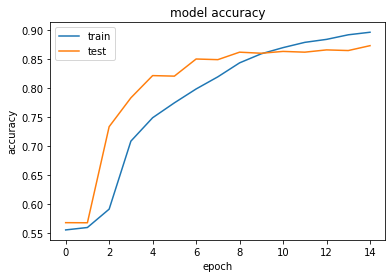

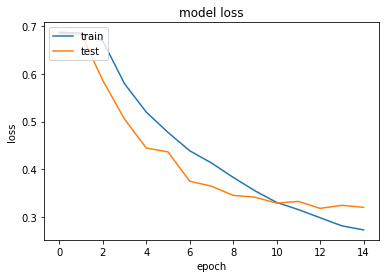

In [39]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We can see that our model has done well to fit the the data and our accuracy has gone up to 87% over 15 epochs. From the above graph we can see that the curve flattens greatly after approximately the 10th epoch, hence, we can be sure that increasing the number of epochs would not greatly increase our model accuracy. We can, however, fine tune further by using the LSTM dimensions. 